# Dodgers football 
Predictive Analytics


Demonstrate the following:

- Box plots
- Scatter plots
- Regression Model
    
First, I will read the csv file into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np

dodgers_df = pd.read_csv('dodgers.csv')
dodgers_df.head(20)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


Going to add a numeric columns for bobbleheads, caps, shirts, and fireworks (0 = No, 1 = Yes) and for the day_night column using the get_dummies method in pandas.

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,bobble_numeric,cap_numeric,shirt_numeric,fireworks_numeric,Day,Night,day_num
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,0,0,0,0,1,0,3
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,4
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,5
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,0,0,0,1,0,1,6
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,7
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO,0,0,0,0,1,0,1
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,2
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,3
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,4
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO,0,0,0,1,0,1,6


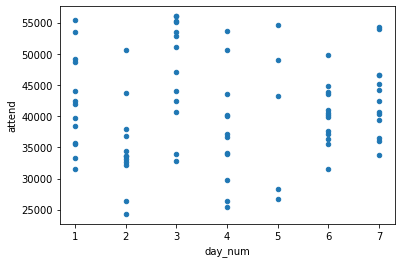

In [2]:
dodgers_df['bobble_numeric'] = dodgers_df['bobblehead'].apply(lambda x: 0 if x == 'NO' else 1)
dodgers_df['cap_numeric'] = dodgers_df['cap'].apply(lambda x: 0 if x == 'NO' else 1)
dodgers_df['shirt_numeric'] = dodgers_df['shirt'].apply(lambda x: 0 if x == 'NO' else 1)
dodgers_df['fireworks_numeric'] = dodgers_df['fireworks'].apply(lambda x: 0 if x == 'NO' else 1)

game_time = pd.get_dummies(dodgers_df['day_night'])
dodgers_df = pd.concat([dodgers_df, game_time], axis=1)

# to convert the day of the week into a numeric
day_dict = {
    'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7,
}

dodgers_df['day_num'] = dodgers_df['day_of_week'].apply(lambda x: day_dict.get(x)).astype(int)
dodgers_df.plot.scatter('day_num', 'attend')

dodgers_df.head(11)

I am curious to see how many different types of 'skies' were recorded and the different teams that the Dodgers played:

In [3]:
print(dodgers_df['skies'].unique())
dodgers_df['opponent'].unique()

['Clear ' 'Cloudy']


array(['Pirates', 'Padres', 'Braves', 'Nationals', 'Giants', 'Rockies',
       'Snakes', 'Cardinals', 'Astros', 'Brewers', 'Angels', 'White Sox',
       'Mets', 'Reds', 'Phillies', 'Cubs', 'Marlins'], dtype=object)

count       81.000000
mean     41040.074074
std       8297.539460
min      24312.000000
25%      34493.000000
50%      40284.000000
75%      46588.000000
max      56000.000000
Name: attend, dtype: float64


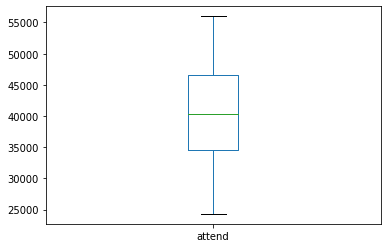

In [4]:
import matplotlib.pyplot as plt
dodgers_df.boxplot(column=['attend'], grid=False)
print(dodgers_df['attend'].describe())

These statistics give insight as to what can be considered a high attendance number and what could be considered a low attendance number.
    
We will now take a look at the statistics of the games that were considered good (in the upper quartile).

In [5]:
# dataframe where attendance was 75% quartile or higher:
dodgers_df_75 = dodgers_df[dodgers_df['attend']>=46588]
dodgers_df_75.head(21)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,bobble_numeric,cap_numeric,shirt_numeric,fireworks_numeric,Day,Night,day_num
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,0,0,0,0,1,0,3
10,APR,28,54242,Saturday,Nationals,71,Clear,Night,NO,NO,NO,YES,1,0,0,0,0,1,7
11,APR,29,48753,Sunday,Nationals,74,Clear,Day,NO,YES,NO,NO,0,0,1,0,1,0,1
17,MAY,13,49124,Sunday,Rockies,70,Clear,Day,NO,NO,NO,NO,0,0,0,0,1,0,1
19,MAY,15,47077,Tuesday,Snakes,70,Clear,Night,NO,NO,NO,YES,1,0,0,0,0,1,3
27,MAY,29,51137,Tuesday,Brewers,74,Clear,Night,NO,NO,NO,YES,1,0,0,0,0,1,3
30,JUN,11,50559,Monday,Angels,68,Clear,Night,NO,YES,NO,NO,0,0,1,0,0,1,2
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,NO,NO,NO,YES,1,0,0,0,0,1,3
35,JUN,17,53504,Sunday,White Sox,74,Clear,Day,NO,NO,NO,NO,0,0,0,0,1,0,1
36,JUN,28,49006,Thursday,Mets,75,Clear,Night,NO,NO,NO,YES,1,0,0,0,0,1,5


We will now take a look at the statistics of the games that were considered bad (in the lower quartile).

In [6]:
# dataframe where attendance was 25% quartile or lower:
dodgers_df_25 = dodgers_df[dodgers_df['attend']<=34493]
dodgers_df_25.head(21)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,bobble_numeric,cap_numeric,shirt_numeric,fireworks_numeric,Day,Night,day_num
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,4
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,5
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,0,0,0,1,0,1,6
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,2
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,4
13,MAY,8,32799,Tuesday,Giants,75,Clear,Night,NO,NO,NO,NO,0,0,0,0,0,1,3
14,MAY,9,33993,Wednesday,Giants,71,Clear,Night,NO,NO,NO,NO,0,0,0,0,0,1,4
16,MAY,12,33735,Saturday,Rockies,65,Clear,Night,NO,NO,NO,NO,0,0,0,0,0,1,7
18,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,NO,NO,0,0,0,0,0,1,2
25,MAY,27,33306,Sunday,Astros,70,Clear,Day,NO,NO,NO,NO,0,0,0,0,1,0,1


Bobbleheads on a Monday night is probably a good thing. Mondays are most consistent lower IQR nights and bobbleheads are most consistent upper IQR events. Tuesday is a popular day for games.

Making a general, non-mathematical observation of the data suggests that bobbleheads help boost attendance numbers.
We will get a count of how many games in the upper-quartile included bobbleheads.

In [7]:
dodgers_df_75['bobble_numeric'].sum()

11

Out of the 21 games in the upper-quartile, 11 of them included bobbleheads. (52%)

Another general, non-mathematical observation of the data suggests that Monday's are the nights that need the most help.
We will get a count of how many games in the lower-quartile are on Mondays.

In [8]:
mondays = dodgers_df_25[dodgers_df_25['day_num'] == 2]
len(mondays)

8

Out of the 21 games in the lower-quartile, 8 of them were on Mondays. (38%)

We will now take a look at some scatter plots to see if any visual correlations reveal themselves

Text(0.5, 1.0, 'Scatter plot of Day of the Month vs Attendance for Dodgers Games')

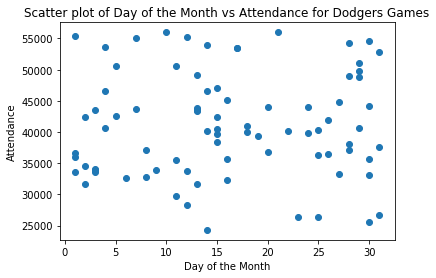

In [9]:
# Will look at a few scatter plots to see if there are any correlations.  The first will be day vs attendance.
plt.scatter(dodgers_df.day, dodgers_df.attend)
plt.xlabel('Day of the Month')
plt.ylabel('Attendance')
plt.title('Scatter plot of Day of the Month vs Attendance for Dodgers Games')

Text(0.5, 1.0, 'Scatter plot of Temperature vs Attendance for Dodgers Games')

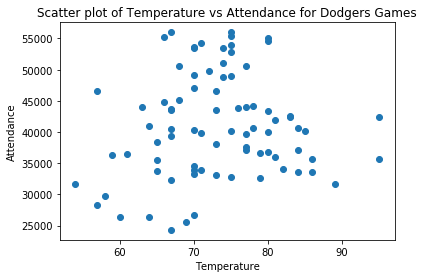

In [10]:
# Temp vs attendance.
plt.scatter(dodgers_df.temp, dodgers_df.attend)
plt.xlabel('Temperature')
plt.ylabel('Attendance')
plt.title('Scatter plot of Temperature vs Attendance for Dodgers Games')

Looking at the temperature is out of curiosity as there is no way to control the weather.

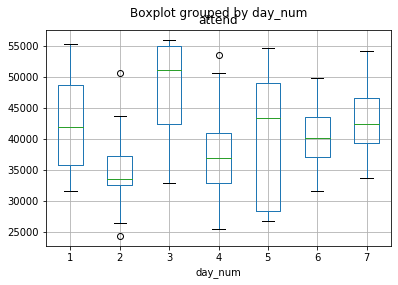

In [11]:
# Boxplot of day vs attendance.
dodgers_df.boxplot(column=['attend'], by='day_num')

At this point, we are ready to quantify the correlations between the variables that we have control over, namely:
- Bobblehead giveaways
- Day or Night games (to an extent this can be controlled)
- Cap giveaways
- Shirt giveaways
- Fireworks displays

To begin, we will look at the r_squared, or correlation between bobblehead giveaways and attendance.

In [12]:
from sklearn.linear_model import LinearRegression
x = dodgers_df['bobble_numeric'].values.reshape(-1,1)
y = dodgers_df['attend']

model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
r_sq

0.3386017539503713

With a value of 0.338, this means that 33.8% of game attendance can be predicted by whether bobbleheads are offered at the game.

In [13]:
# My curiosity wants to know what the correlation between the temperature and attendance is.

x = dodgers_df['temp'].values.reshape(-1,1)
y = dodgers_df['attend']

model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
r_sq

0.009791247146878956

This confirms my suspicion that game temperature has no bearing on game attendance.

Finally, we will include all the variable in this dataset that we have control over, namely bobbleheads, caps, shirts,
fireworks, or if the game is played at day or at night.

In [14]:
# using multiple variables to determine what drives attendance.
X = dodgers_df[['bobble_numeric', 'cap_numeric', 'shirt_numeric', 'fireworks_numeric', 'Day', 'Night']]
y = dodgers_df['attend']
model = LinearRegression().fit(X,y)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bobble_numeric,16011.080206
cap_numeric,-1038.042156
shirt_numeric,8114.119843
fireworks_numeric,3944.300985
Day,2093.985998
Night,-2093.985998


Based on this information, the final analysis would be as follows:

- Having Bobblehead giveaways at the game results in an attendance increase of approximately 16,011.
- Giving away caps results in an attendance decrease of approximately 1,038.
- Giving away shirts results in an attendance increase of 8,114.
- Fireworks result in an increase of approximately 3,944.
- Having a day game boosts attendance by 2,093 (which means having a night game decreases attendance by 2,093).

Having fireworks (3,944) at a night game (-2,093; difference of +1,851) is about the same as having a day game (2,093),
so I would not recommend having fireworks displays.

Going back to our attendance by day of the week, Mondays were the lowest attended baseball games.  If I were to suggest
a marketing promotion to increase attendance, initially it would be to give away Bobbleheads (16,011) and t-shirts 
(8,114).  If that proved successful, then for future games we could drop the t-shirts and only offer 
Bobbleheads as a giveaway and incentive.